In [4]:
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

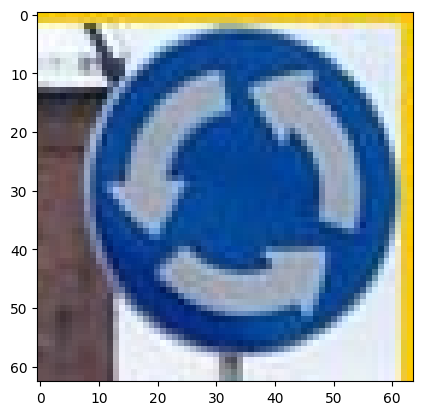

In [5]:
from fastai.vision.core import PILImage
from PIL_OpenCV_conversions import PILToOpenCV
from OpenCV_plots import plotOpenCV

imagePIL = PILImage.create(btn_upload.data[-1])

BGRImage = PILToOpenCV(imagePIL)
plotOpenCV(BGRImage)

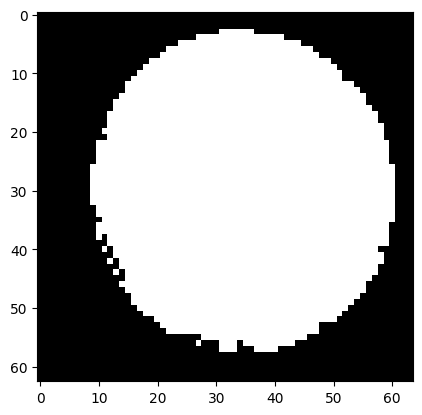

In [6]:
import cv2
from crop_image import findMainColor
from crop_image import getInsideMask
from crop_image import getFinalMask
HSV_image = cv2.cvtColor(BGRImage, cv2.COLOR_BGR2HSV)
HSV_mean = findMainColor(HSV_image)
inside_mask = getInsideMask(HSV_image, HSV_mean)
finalMask = getFinalMask(HSV_image, inside_mask)
plotOpenCV(finalMask)

In [1]:
import numpy as np
from image_analisys_functions import expandImageToThreeLayers
maskRGB = expandImageToThreeLayers(finalMask)
plotOpenCV(maskRGB)

NameError: name 'finalMask' is not defined

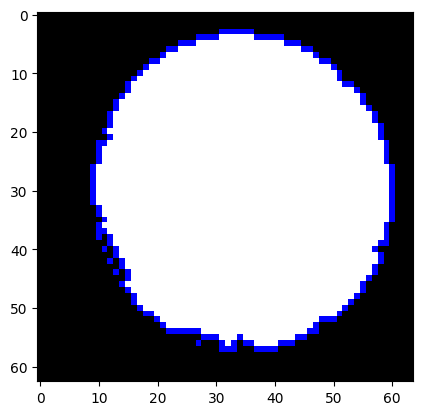

In [56]:
contours, hierarchy = cv2.findContours(finalMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plotOpenCV(cv2.drawContours(maskRGB.copy(), contours, -1, (255, 0, 0), 1))

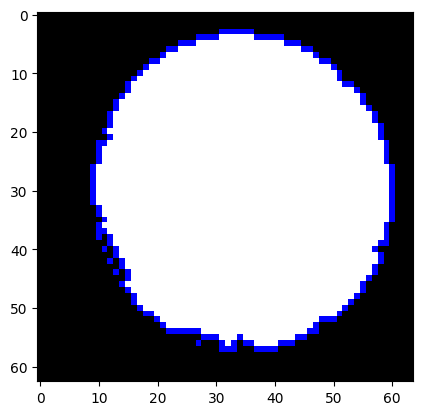

In [57]:
from image_analisys_functions import getMaskContour
mainContour = getMaskContour(finalMask)
plotOpenCV(cv2.drawContours(maskRGB.copy(), [mainContour], -1, (255, 0, 0), 1))

In [ ]:
from image_analisys_functions import getEllipsisityDeviation

ellipsisityDeviation = getEllipsisityDeviation(mainContour)
ellipsisityDeviation

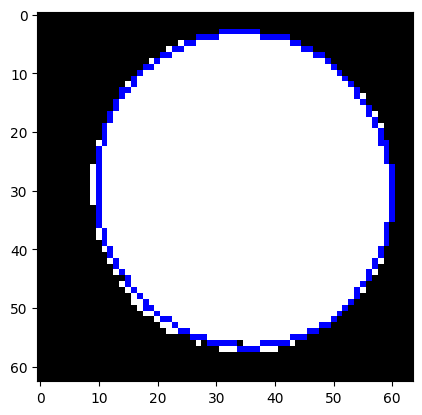

In [62]:
ellipse = cv2.fitEllipse(mainContour)
ellipseMask = maskRGB.copy()
cv2.ellipse(ellipseMask, ellipse, (255, 0, 0), 1)
plotOpenCV(ellipseMask)

In [69]:
import math
math.pi * ellipse[1][0]*ellipse[1][1]

8454.075007663758

In [71]:
4*cv2.contourArea(mainContour)

8482.0

In [ ]:
from image_analisys_functions import getNumberOfVertices
from image_analisys_functions import ImageSize
imageSize = ImageSize.createFromOpenCVImage(BGRImage)
getNumberOfVertices(mainContour, imageSize)

In [ ]:
from image_analisys_functions import getShape
shape = getShape(mainContour, imageSize)
shape